                                                        Programming Assignment - 2

####  Use images from ALL FOUR classes.

In [3]:
import os

directory = os.getcwd()
images = r'cropped_images'

given_folders = ["n02090379-redbone","n02097047-miniature_schnauzer","n02104365-schipperke","n02112018-Pomeranian"]


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure

breed=[]

class_labels = {"n02090379-redbone": 0,"n02097047-miniature_schnauzer":1,"n02104365-schipperke":2,"n02112018-Pomeranian":3}

def get_images(n):
    img= []
    for folder in os.listdir(images)[:n]:
        path = os.path. join(images, folder)
        if os. path. isdir (path):
            imag = os. listdir (path)
            crop_images = [image for image in imag if image. lower().endswith(('.jpg'))]
            for image in crop_images:
                src_path = os. path. join (path, image)
                img.append(src_path)
                breed.append(class_labels[folder])
    return img,breed

In [6]:
img,breed=get_images(4)

###  Convert the images to edge histograms. (Assignment 1- These will be the vector representations of the  images). This will be your dataset for Part 3. 

In [10]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical Sobel operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)
hist_vectors=[]
for imge in img:
    image = io.imread(imge)
    gray_img = color.rgb2gray(image)
    angle_sobel = angle(filters.sobel_h(gray_img), filters.sobel_v(gray_img))
    hist,hist_centers =exposure.histogram(angle_sobel,nbins=36)
    hist_vectors.append(hist)

In [11]:
hist=np.array(hist_vectors)
breed=np.array(breed)

### Split the dataset into a training set and a test set: For each class, perform a training/test split of 80/20.


In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(hist, breed, test_size=0.2,stratify=breed, random_state=42)

### Performstandardizationonthetrainingdataset. (seehttps://scikit-learn.org/stable/modules/ preprocessing.html

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


### Perform standardization on the test dataset using the means and variances you obtained from the training dataset.

In [19]:
X_test_scaled = scaler.transform(X_test)

(PerformanceComparison)Performstratified5-foldcross-validationonthe4-classclassificationproblem
 using the three classification methods (available on canvas) assigned to you. Plot the (3) confusion
 matrices for using three approaches (clearly label the classes) on the test set (See Figure 1). (If you use
 code from any website, please do proper referencing. You will get 0 point for this assignment without
 proper referencing) (3.75 points)

## three classification methods 1.Decision Tree 2. Neural Network 3. Random Forest classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import StratifiedKFold , cross_val_score,KFold
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

In [27]:
validation =StratifiedKFold(n_splits=5)
def model_comparision(model):
    true,predicted,cm,val_accuracy=[],[],[],[]
    for train, test in validation.split(X_train_scaled, y_train):
        xtrain, xval = X_train_scaled[train], X_train_scaled[test]
        ytrain, yval = y_train[train], y_train[test]
        
        model.fit(xtrain, ytrain)
        pred= model.predict(xval)
        true.extend(yval)
        predicted.extend(pred)
      
        val_acc = accuracy_score(yval, pred)
        val_accuracy.append(val_acc)
        
    print("mean validation accuracy: "+str(np.mean(val_accuracy)))
    
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    print("test accuracy : "+str(test_acc))

    f1score = f1_score(y_test, model.predict(X_test_scaled), average='weighted')
    print("f1 score : "+str(f1score))
    
    
    cm.append(confusion_matrix(y_test, model.predict(X_test_scaled)))
    cm_display = ConfusionMatrixDisplay(confusion_matrix = sum(cm)/len(cm), display_labels =given_folders )
    cm_display.plot(xticks_rotation=45)
    plt.show()

mean validation accuracy: 0.40740740740740744
test accuracy : 0.3333333333333333
f1 score : 0.3111371462165113


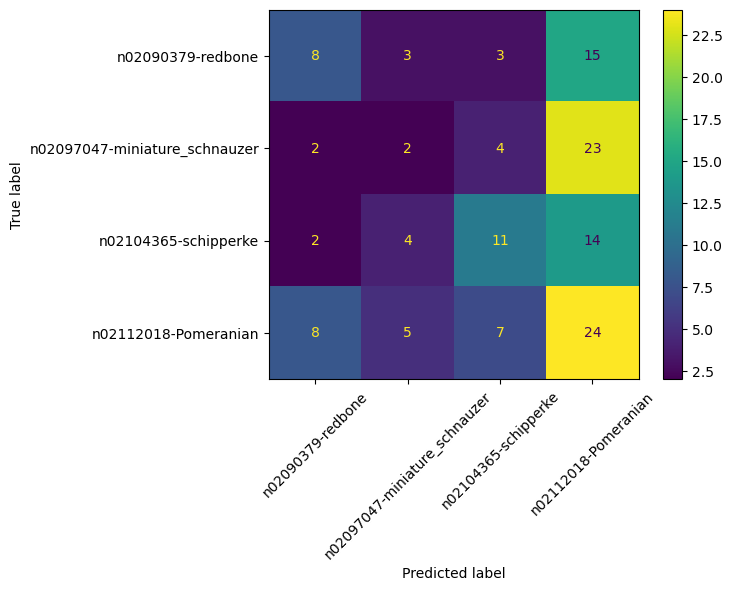

In [29]:
model_comparision(RandomForestClassifier(n_estimators=100, random_state=42))

mean validation accuracy: 0.35
test accuracy : 0.2814814814814815
f1 score : 0.26869185684000496


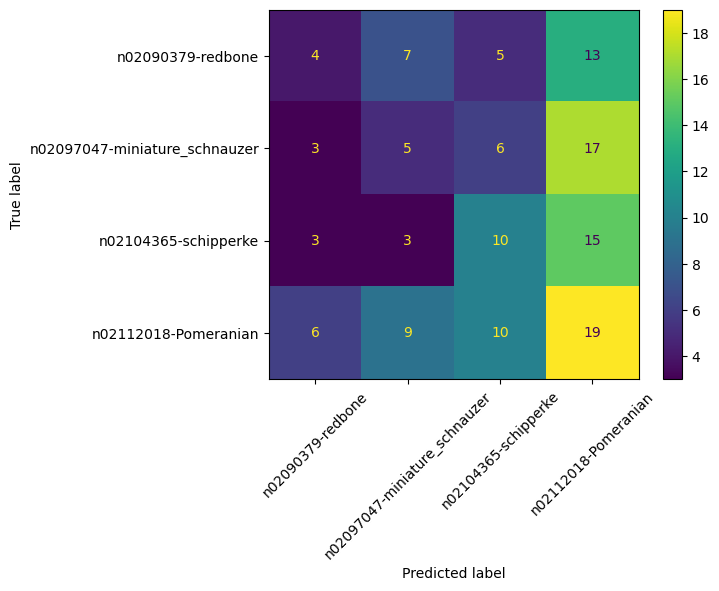

In [30]:
model_comparision(DecisionTreeClassifier())

mean validation accuracy: 0.4111111111111111
test accuracy : 0.37777777777777777
f1 score : 0.36063228851804063


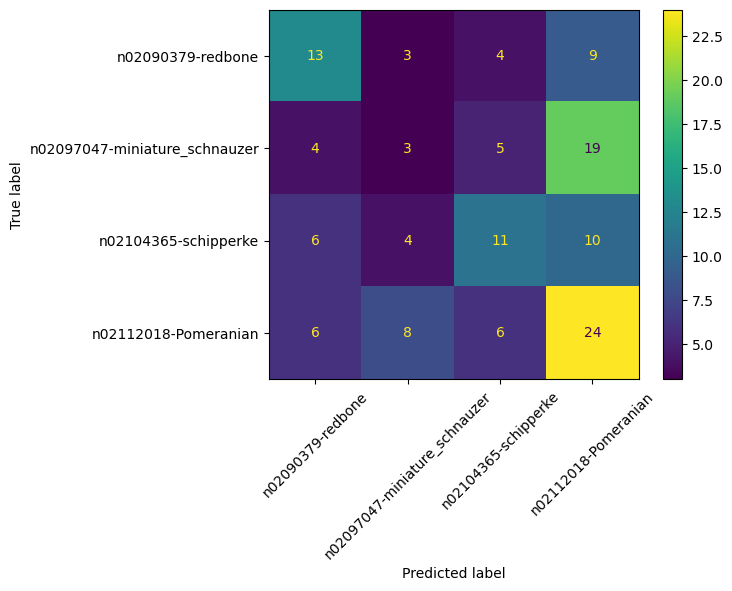

In [31]:
import warnings
warnings.filterwarnings("ignore")
model_comparision(MLPClassifier(hidden_layer_sizes=(10,10,10)))

#### Based on Confusion matrix, we can see MLP classifier classify each category very well compared to other as confusion matrix compares the actual values with respect to predicted values.¶
#### Based on the validation accuracies with 5 fold we see that MLP classifier is giving highest accuracy:0.41
#### Based on test accuracy , we can see MLP classifier is giving the highest accuracy of 0.37
#### Comparing the F1 scores of all three classifiers, which is combined results of precision and recall we can see that MLP is again giving us better results
## From the above observations we can see MLP is best model for the dataset

(Model Selection) Use images from TWO classes. Perform a standard 5-fold cross-validation and
 a stratified 5-fold cross-validation on the training set (i.e., the standardized edge histogram dataset
 obtained from the training set) for Support Vector Classifiers using LinearSVC such that parameter
 𝐶 =0.1,1,10,100 and other parameters set as default. (2.5 points)
 • Plot a graph (x-axis: 𝐶; y-axis: mean validation/training error (%)) containing four error curves (2
 validation error curves and 2 training error curves- label them clearly using a legend to define the
 curves). Which 𝐶 has/have the lowest mean error for each curve? Comment about (1) the model
 complexity for SVM in relation to 𝐶, and (2) when/whether there is overfitting/underfitting. (1.5
 points

In [41]:
img,breeds=get_images(2)

hist_vectors=[]
for imge in img:
    image = io.imread(imge)
    gray_img = color.rgb2gray(image)
    angle_sobel = angle(filters.sobel_h(gray_img), filters.sobel_v(gray_img))
    hist,hist_centers =exposure.histogram(angle_sobel,nbins=36)
    hist_vectors.append(hist)

hist=np.array(hist_vectors)
breeds=np.array(breeds)

X_train, X_test, y_train, y_test = train_test_split(hist, breed, test_size=0.2,stratify=breed, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

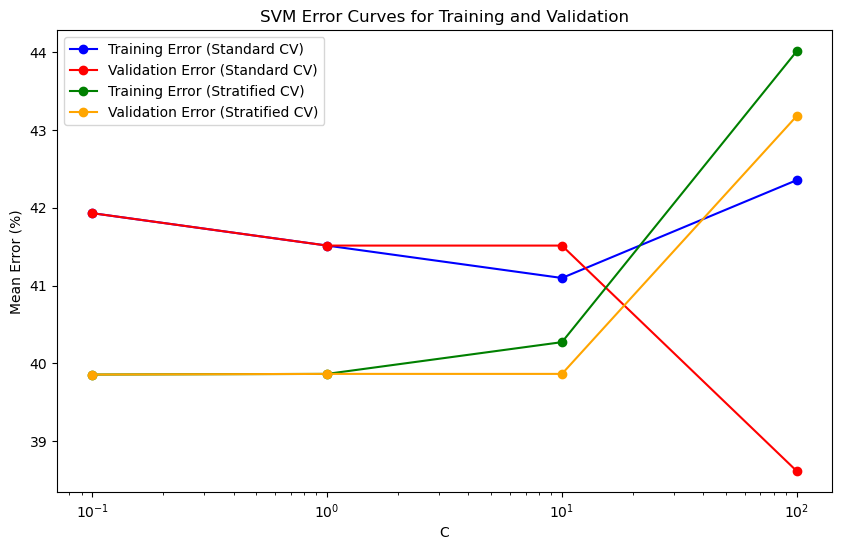

In [43]:
C = [0.1,1,10,100]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import load_digits

# Arrays to store the errors for plotting
train_error_standard = []
val_error_standard = []
train_error_stratified = []
val_error_stratified = []

# Standard 5-Fold Cross-Validation
kf = KFold(n_splits=5)

# Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)

# Iterate over each value of C
for c in C:
    # Create SVC model with specific C value
    svc = LinearSVC(C=c, max_iter=10000)

    # Perform standard 5-fold cross-validation for training and validation error
    val_scores_standard = cross_val_score(svc, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    train_scores_standard = cross_val_score(svc, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    
    # Perform stratified 5-fold cross-validation for training and validation error
    val_scores_stratified = cross_val_score(svc, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    train_scores_stratified = cross_val_score(svc, X_train_scaled, y_train, cv=skf, scoring='accuracy')

    # Store mean training and validation errors
    train_error_standard.append(100 * (1 - np.mean(train_scores_standard)))
    val_error_standard.append(100 * (1 - np.mean(val_scores_standard)))
    train_error_stratified.append(100 * (1 - np.mean(train_scores_stratified)))
    val_error_stratified.append(100 * (1 - np.mean(val_scores_stratified)))

# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(C, train_error_standard, label="Training Error (Standard CV)", marker='o', color='blue')
plt.plot(C, val_error_standard, label="Validation Error (Standard CV)", marker='o', color='red')
plt.plot(C, train_error_stratified, label="Training Error (Stratified CV)", marker='o', color='green')
plt.plot(C, val_error_stratified, label="Validation Error (Stratified CV)", marker='o', color='orange')

# Add labels, legend, and title
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Error (%)')
plt.title('SVM Error Curves for Training and Validation')
plt.legend()
plt.show()


### The lowest mean error for standard Train at c=10 , stratified Train at c=0.1 , standard val at c=100, stratified val at c=10

### For small C (like 0.1), the model has lower complexity, which is evident from the relatively high validation error. It means the model might be underfitting.
### For large C (like 100), the validation error increases while training error continues to decrease, indicating overfitting, meaning the model complexity is too high.

In [46]:
best_C = 10
svm_classifier = LinearSVC(C=best_C, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"Test Error for C={best_C}: {test_error * 100:.2f}%")


Test Error for C=10: 37.70%
